## Phase 1: Problem Understanding & Data Exploration

### 1. Introduction
This notebook analyzes real estate rental prices and prepares the dataset for machine learning.

### 2. Goal of the Dataset
The goal of this dataset is to analyze and predict real estate rental prices based on key property attributes. The dataset includes details such as:
- **Property Type (e.g., Studio, Apartment, Villa)**
- **City and Neighborhood**
- **Rental Price per Night**
- **Property Size (sqm)**
- **Ratings and Number of Reviews**

This dataset is useful for:
- **Real estate market analysis**
- **Rental price estimation**
- **Investment decision-making**
- **Understanding factors affecting rental costs**

### 3. Dataset Source
- **Source:** [Kaggle - Real Estate Rental Prices](https://www.kaggle.com/datasets/mouathalmansour/real-estate-rental-prices?resource=download)
- **Description:** This dataset is collected from online rental listings and provides detailed information about properties available for rent.

### 4. General Information
- **Number of Observations (Rows):** At least **a few hundred listings**
- **Number of Features (Columns):** **10**
- **Types of Variables:**
  - **Categorical:** Property type, city, neighborhood
  - **Numerical:** Price per night, land area, number of reviews
  - **Text:** Property name

### Dataset Columns & Data Types:
| Column Name        | Type         | Description |
|-------------------|-------------|-------------|
| التصنيف  | Categorical | Property type (e.g., "Studio", "Apartment") |
| المدينة | Categorical | City where the property is located |
| الحي | Categorical | Neighborhood within the city |
| اسم العقار | Text | Name of the rental property |
| سعر الليلة | Numerical | Rental price per night (in local currency) |
| المساحة | Numerical | Property size in square meters (sqm) |
| عدد المقيمين | Numerical | Maximum number of occupants allowed |
| التقييم | Numerical | Average user rating of the property |
| الرقم | Numerical | Property ID (Index) |


### 5. Summary of the dataset

In [1]:
import pandas as pd
# Load dataset
df = pd.read_csv("/content/real_estate_rental_prices.csv")  # Adjust path if needed

In [2]:
num_rows, num_cols = df.shape
print(f"Dataset contains {num_rows} rows and {num_cols} columns.")
print("\nColumn Data Types:")
print(df.dtypes)


Dataset contains 16913 rows and 10 columns.

Column Data Types:
Unnamed: 0        int64
الرقم             int64
التقييم         float64
عدد المقيمين      int64
المساحة           int64
اسم العقار       object
الحي             object
سعر الليلة       object
المدينة          object
التصنيف          object
dtype: object


In [3]:
print("Dataset Overview:")
df.info()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16913 entries, 0 to 16912
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16913 non-null  int64  
 1   الرقم         16913 non-null  int64  
 2   التقييم       16913 non-null  float64
 3   عدد المقيمين  16913 non-null  int64  
 4   المساحة       16913 non-null  int64  
 5   اسم العقار    16913 non-null  object 
 6   الحي          16913 non-null  object 
 7   سعر الليلة    16913 non-null  object 
 8   المدينة       16913 non-null  object 
 9   التصنيف       16913 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 1.3+ MB


In [4]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,Unnamed: 0,الرقم,التقييم,عدد المقيمين,المساحة,اسم العقار,الحي,سعر الليلة,المدينة,التصنيف
0,0,0,10.0,7,40,استديو بسرير ماستر وجلسة,حي العزيزية,250,العلا,استديو
1,1,1,9.2,6,3000,استديو بسريرين فردية وبأثاث بسيط,العذيب,280,العلا,استديو
2,2,2,10.0,43,1000,شقة بغرفة معيشة وغرفتين نوم,حي العزيزية,400,العلا,شقة
3,3,3,9.4,4,400,استراحة بصالة جلوس وغرفتين نوم,حي المعتدل,799,العلا,استراحة
4,4,4,9.6,29,3000,شقة بغرفة جلوس وغرفة نوم,جنوب المستشفى,550,العلا,شقة


In [5]:
print("Summary Statistics \n")
df.describe()

Summary Statistics 



,Unnamed: 0,الرقم,التقييم,عدد المقيمين,المساحة
count,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000
mean,8456.000000,732.859930,7.626010,21.408207,564.237805
std,4882.506887,647.153886,3.579511,35.302708,3880.002160
min,0.000000,0.000000,0.000000,0.000000,10.000000
25%,4228.000000,197.000000,7.800000,1.000000,35.000000
50%,8456.000000,540.000000,9.300000,8.000000,60.000000
75%,12684.000000,1090.000000,9.900000,25.000000,300.000000
max,16912.000000,2387.000000,10.000000,443.000000,110000.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

based on the summary of the statistics

In [7]:
# Checking for missing values
print("Missing Values\n")
df.isnull().sum()

Missing Values



,0
Unnamed: 0,0
الرقم,0
التقييم,0
عدد المقيمين,0
المساحة,0
اسم العقار,0
الحي,0
سعر الليلة,0
المدينة,0
التصنيف,0


In [8]:
# Check for duplicates
print("Number of duplicate rows:\n", df.duplicated().sum())

Number of duplicate rows:
 0


### 3. Data Preprocessing:
- Dropped unnecessary columns.
-  Convert 'سعر الليلة' to numeric format.


In [9]:
df= df.drop(columns=['Unnamed: 0'])

In [10]:
#Convert 'سعر الليلة' to numeric format.
df['سعر الليلة'] = df["سعر الليلة"].str.replace(r"[^\d]", "", regex=True).astype(float)

### 6. Visualizations:

In [11]:
!pip install python-bidi arabic-reshaper
!apt-get install -y fonts-liberation


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-liberation is already the newest version (1:1.07.4-11).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


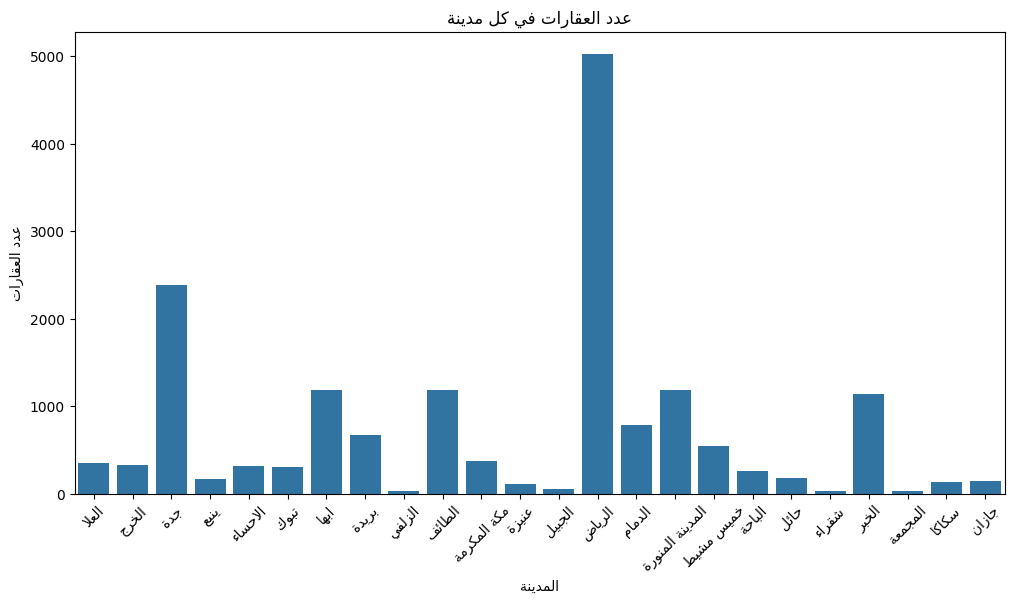

In [12]:
#عدد العقارات في كل مدينة
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'DejaVu Sans'

# Reshape and fix Arabic text for city names
df['المدينة'] = df['المدينة'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='المدينة')
plt.title(get_display(arabic_reshaper.reshape("عدد العقارات في كل مدينة")))
plt.xlabel(get_display(arabic_reshaper.reshape("المدينة")))
plt.ylabel(get_display(arabic_reshaper.reshape("عدد العقارات")))

plt.xticks(rotation=45)
plt.show()

 **Findings**
- Riyadh (الرياض) has the most listings (5000+), followed by Jeddah (جدة)
- madenah(المدينة), Taif (الطائف), and Abha (أبها) have moderate listings.
-Smaller cities (e.g., Sakaka, Al Majma'ah, Jazan) have fewer properties.
Major cities have high demand & competitive markets, while smaller ones may offer emerging opportunities.

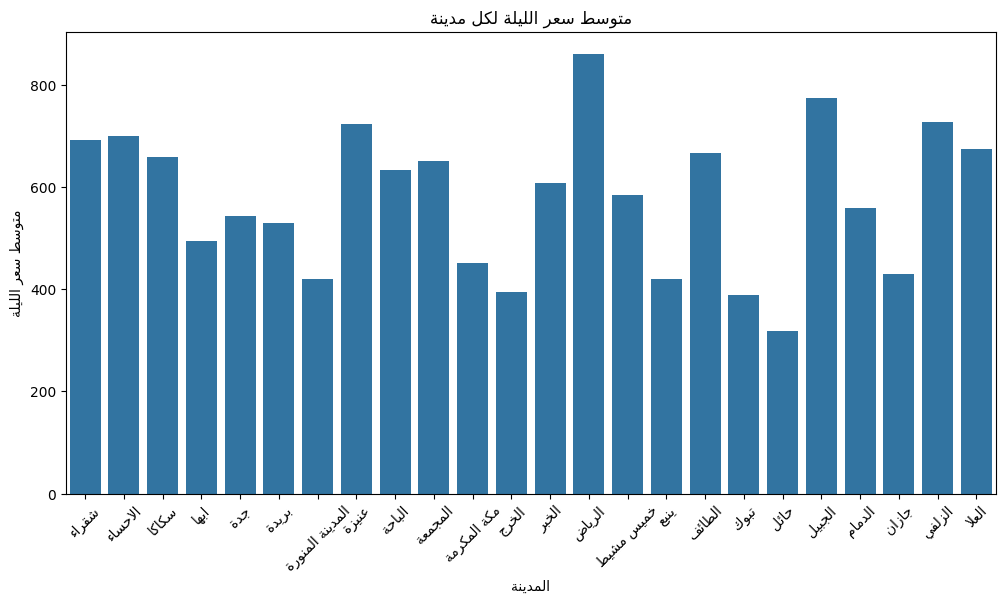

In [15]:
# متوسط سعر اللية في كل مدينة
# Group by city and calculate the average price per night
city_avg_price = df.groupby('المدينة')['سعر الليلة'].mean().reset_index()

# Set a built-in font that supports Arabic
plt.rcParams['font.family'] = 'DejaVu Sans'  # DejaVu Sans supports Arabic characters

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=city_avg_price, x='المدينة', y='سعر الليلة')

# Titles and labels
plt.title(get_display(arabic_reshaper.reshape("متوسط سعر الليلة لكل مدينة")))
plt.xlabel(get_display(arabic_reshaper.reshape("المدينة")))
plt.ylabel(get_display(arabic_reshaper.reshape("متوسط سعر الليلة")))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



 **Findings**

- Highest Rental Prices:
Riyadh (الرياض), have the highest average nightly rates.

- Moderate Prices:
Jeddah (جدة), Dammam (الدمام), and abha (ابها)**have** mid-range prices.
- Lower Prices:
 Hail (حائل) lowest rental prices.


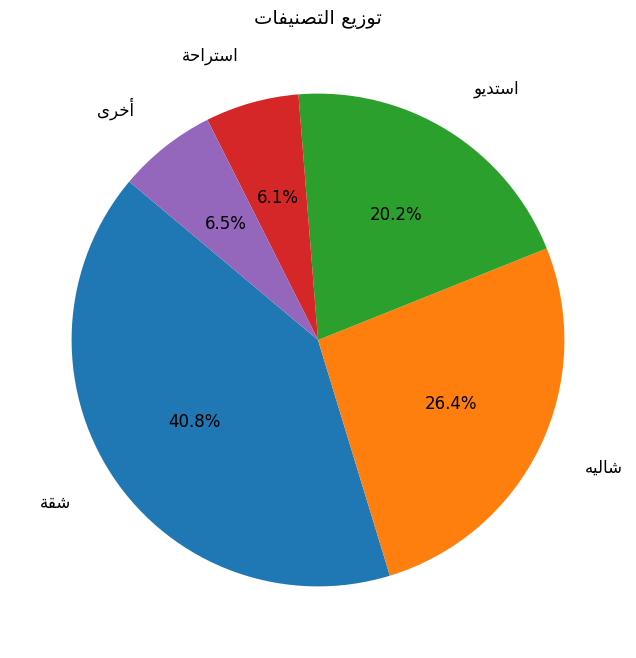

In [14]:
# Fix Arabic text for labels
df['التصنيف'] = df['التصنيف'].apply(lambda x: get_display(arabic_reshaper.reshape(str(x))))

# Count occurrences
counts = df['التصنيف'].value_counts()

# Group small categories into "Other" if less than 2%
threshold = 0.02 * counts.sum()  # 3% of total count
counts_filtered = counts[counts > threshold]

# Fix "أخرى" to display correctly
other_label = get_display(arabic_reshaper.reshape("أخرى"))

# Add "Other" category
counts_filtered[other_label] = counts[counts <= threshold].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust size
plt.pie(
    counts_filtered,
    labels=counts_filtered.index,
    autopct=lambda p: f'{p:.1f}%' if p > 2 else '',  # Hide small percentages
    startangle=140,
    labeldistance=1.2,  # Push labels outward
    textprops={'fontsize': 12}  # Increase font size for readability
)

# Title
plt.title(get_display(arabic_reshaper.reshape("توزيع التصنيفات")), fontsize=14)

# Show the plot
plt.show()

**Findings**
- Apartments (شقة) dominate (40.8%), making them the most common rental type.
- Chalets (شاليه) follow (26.4%), indicating strong demand.
-Studios (استديو) (20.2%) are also significant
- Rest Houses (استراحة) (6.1%) and Other types (أخرى) (6.5%) make up a small portion